In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. (70%) Linear Regression

In [3]:
class Regression():
    
    def __init__(self, train_df, test_df, targetCol):
        self.train_df = train_df
        self.test_df = test_df
        self.target_col = targetCol  
    
    def linear_regression_without_bias(self):
        try:
            x_pseudoinverse = np.linalg.pinv(self.train_df.drop(columns=[self.target_col]))
        except:
            x_pseudoinverse = np.linalg.pinv(self.train_df.drop(columns=[self.target_col]))

        w = x_pseudoinverse.dot(self.train_df[self.target_col])
        y_head = self.test_df.drop(columns=[self.target_col]).dot(w)

        return y_head    
    
    
    def linear_regression_without_bias_reg(self, lambdaValue):
        n, m = self.train_df.drop(columns=[self.target_col]).shape

        I = np.identity(m)
        X = self.train_df.drop(columns=[self.target_col])
        y = self.train_df[self.target_col]
        w_reg = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + (lambdaValue)*I), X.T), y)   ###### ?
        
        y_head = self.test_df.drop(columns=[self.target_col]).dot(w_reg)

        return y_head
    
    
    def linear_regression_bias_reg(self, lambdaValue):
        X = self.train_df.drop(columns=[self.target_col])
        y = self.train_df[self.target_col]
        
        # add bias term
        X = np.hstack([np.ones([X.shape[0],1]), X])

        n, m = X.shape
        I = np.identity(m)
        
        w_reg = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + (lambdaValue)*I), X.T), y)   
        
        X_test = self.test_df.drop(columns=[self.target_col])
        X_test = np.hstack([np.ones([X_test.shape[0],1]), X_test])
        
        y_head = X_test.dot(w_reg) 
        
        return y_head
    
    
    def linear_regression_Bayesian(self, alphaValue):

        X = self.train_df.drop(columns=[self.target_col])
        y = self.train_df[self.target_col]
        
        # add bias term
        X = np.hstack([np.ones([X.shape[0],1]), X])
        
        n, m = X.shape
        I = np.identity(m)

        posterior_mean = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + (alphaValue)*I), X.T), y)   
        
        X_test = self.test_df.drop(columns=[self.target_col])
        X_test = np.hstack([np.ones([X_test.shape[0],1]), X_test])
        
        y_head = X_test.dot(posterior_mean)
        
        return y_head
     
    def predict(self, predict_set, alphaValue):
        
        X = self.train_df.drop(columns=[self.target_col])
        y = self.train_df[self.target_col]
        
        # add bias term
        X = np.hstack([np.ones([X.shape[0],1]), X])
        
        n, m = X.shape
        I = np.identity(m)

        posterior_mean = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + (alphaValue)*I), X.T), y)   
        
        X_test = predict_set
        X_test = np.hstack([np.ones([X_test.shape[0],1]), X_test])
        
        y_head = X_test.dot(posterior_mean)
        
        return y_head
        
    def RMSE(self, y_head):
        RMSE = np.sqrt(np.mean((y_head-self.test_df[self.target_col])**2))

        return RMSE
    
    def plot_result(self, y1, y2, y3, y4):
        self.test_df[self.target_col].plot(label="Ground Truth")
        y1.plot(label = "Linear Regression")
        y2.plot(label = "Linear Regression(reg)")
        plt.plot(y3, label = "Linear Regression(r/b)")
        plt.plot(y4, label = "Bayesian Linear Regression")
       
        plt.grid(True)
        plt.legend(loc = 'lower right')

        plt.title("Regression result comparison")
        plt.ylabel("Value")
        plt.xlabel("Sample Index")

        plt.show()

### (a) Split train & test set, Data preprocessing

In [4]:
class Data_preprocess():
    
    def __init__(self, df):
        self.df = df.dropna(axis=0)
        self.df = df
    
    def split_train_test(self, trainingPercentage):
        '''
            split the data into training and testing sets
            
            trainingPercentage: the percentage of tarining data in the whole data
        '''
        # split df into training set and test set 
        df_copy = self.df.copy()
        train_df = df_copy.sample(frac=trainingPercentage, random_state=7)  # frac: Fraction of axis items to return.
        test_df = df_copy.drop(train_df.index)

        # reset index
        train_df.reset_index(drop=True, inplace=True)
        test_df.reset_index(drop=True, inplace=True)

        return train_df, test_df
    
    def normalize_data(self, train_df, test_df, target):
        '''
            normalize both the training and testing set
            
            train_df: dataframe of the training set
            test_df: dataframe of the testing set
            target: the name of the target column
        '''
        for c in test_df.columns:
            if c != target:
                train_mean = train_df[c].mean()
                train_std = train_df[c].std()
                train_df[c] = (train_df[c]-train_mean)/train_std
                test_df[c] = (test_df[c]-train_mean)/train_std

        return train_df, test_df

In [5]:
# read file from 'train.csv'
df = pd.read_csv('train.csv')

# drop the columns which are not used in hw1
df = df.drop(columns=['ID', 'reason', 'Mjob', 'Fjob', 'guardian', 'G1', 'G2'])

# transform binary columns to one-hot encoding vectors
df = pd.get_dummies(df)
    
d = Data_preprocess(df)
train_df, test_df = d.split_train_test(trainingPercentage=0.8)
train_df, test_df = d.normalize_data(train_df, test_df, 'G3')

### (b) linear regression model without the bias

In [6]:
r = Regression(train_df, test_df, "G3")

In [81]:
y1 = r.linear_regression_without_bias()
print('b) Linear Regression (without bias/without reg):')
print("RMSE: ", r.RMSE(y1))
print("Variance: ", y1.var())
print('\n')

b) Linear Regression (without bias/without reg):
RMSE:  11.792746473470308
Variance:  4.121136428163525




### (c) regularized linear regression model without the bias

In [83]:
y2 = r.linear_regression_without_bias_reg(lambdaValue=1)
print('c)　Linear Regression (without bias/with reg):')
print("RMSE: ", r.RMSE(y2))
print("Variance: ", y2.var())
print('\n')

c)　Linear Regression (without bias/with reg):
RMSE:  11.792810356688442
Variance:  4.114787482735242




### (d) regularized linear regression model with the bias

In [84]:
y3 = r.linear_regression_bias_reg(lambdaValue=1)
print('d) Linear Regression (with bias/with reg):')
print("RMSE: ", r.RMSE(y3))
print("Variance: ", y3.var())
print('\n')

d) Linear Regression (with bias/with reg):
RMSE:  3.499243675883523
Variance:  4.0942135453215025




### (e) Bayesian linear regression model with the bias

In [85]:
y4 = r.linear_regression_Bayesian(alphaValue=1)
print('e) Bayesian Linear Regression:')
print("RMSE: ", r.RMSE(y4))
print("Variance: ", y4.var())
print('\n')

e) Bayesian Linear Regression:
RMSE:  3.499243675883523
Variance:  4.0942135453215025




### (f)  Plot

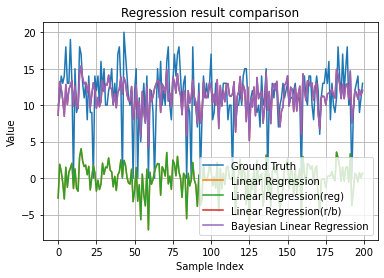

In [11]:
r.plot_result(y1, y2, y3, y4)

### (g) Predict test_no_G3.csv

In [12]:
### tuning ####
# RMSE_list = {}
# r = Regression(train_df, test_df, "G3")
# for i in np.linspace(0.001, 5, 100):
#     y_head = r.predict(train_df.drop(columns=['G3']), alphaValue=i)
#     rmse = np.sqrt(np.mean((y_head - train_df['G3'])**2))
#     RMSE_list[i] = rmse

# key_min = min(RMSE_list.keys(), key=(lambda k: RMSE_list[k]))
# print('min RMSE: ' + str(RMSE_list[key_min])+" ; alpha: " + str(key_min))

min RMSE: 3.2686563394152475 ; alpha: 0.001


In [13]:
# read file from 'test_no_G3.csv'
G3_test = pd.read_csv('test_no_G3.csv', index_col="ID")

# drop the columns which are not used in hw1
G3_test_df = G3_test.drop(columns=['reason', 'Mjob', 'Fjob', 'guardian', 'G1', 'G2'])

# transform binary columns to one-hot encoding vectors
G3_test_df = pd.get_dummies(G3_test_df)

# normalize
for c in G3_test_df.columns:
    if c != "G3":
        G3_test_df[c] = (G3_test_df[c]-G3_test_df[c].mean())/G3_test_df[c].std()
    
y_predict = r.predict(G3_test_df, alphaValue=0.001)
index_li = np.arange(1001, 1045, 1).tolist()
y_predict = pd.DataFrame(y_predict, index=index_li)

y_predict.to_csv('R09725012_1.txt', sep='\t', header=False)

### 2. (20%) Census Income Data Set


### (a) Split train & test set, Data preprocessing

In [14]:
# read file 
header_list = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "y"]
header_list_without_target = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country"]
df2 = pd.read_csv('Q2/adult.data.csv', names = header_list)

# transform the target column to 0, 1 by Category Codes method
## converting type of columns to 'category'
df2['y'] = df2['y'].astype('category')

## Assigning numerical values and storing in another column
df2['y'] = df2['y'].cat.codes

# transform binary columns to one-hot encoding vectors
df2 = pd.get_dummies(df2)

d2 = Data_preprocess(df2)
train_df2, test_df2 = d2.split_train_test(trainingPercentage=0.8)
train_df2, test_df2 = d2.normalize_data(train_df2, test_df2, 'y')

### (b)

In [27]:
class Logistic_Regression():
    
    def __init__(self, learning_rate, iterations, bias, reg):
        
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.bias = bias
        self.reg = reg
        self.lambdaValue = 1
        
    def sigmoid(self, x):    
        output = 1.0 / (1 + np.exp(-x))
        return output
    
    def fit(self, train_x, train_y):
        x, y = train_x, train_y
        
        if self.bias == True:
            x = np.hstack([np.ones([x.shape[0],1]), x])
            weight = np.zeros(x.shape[1])  
        else:
            weight = np.zeros(x.shape[1])
            
        m = x.shape[0]
        for i in range(self.iterations): 
            
            h = self.sigmoid(np.dot(x, weight))
            if self.reg == True:
                reg = (self.lambdaValue/2) * weight.T@weight
                cost = (1/m) * np.sum((-y)@np.log(h+1e-5) - (1-y)@np.log(1-h+1e-5)) + reg
                dW = 1/m * np.dot(x.T, (h - y)) + (self.lambdaValue) * weight  # derivative
                weight -= self.learning_rate * dW
            else:
                cost = (1/m) * np.sum((-y)@np.log(h+1e-5) - (1-y)@np.log(1-h+1e-5))
                dW = 1/m * np.dot(x.T, (h - y))  # derivative
                weight -= self.learning_rate * dW
            
            self.loss = cost
            # if i % 200 == 0:
            #    print("iter:" + str(i) + ";  cost: " + str(cost))
        
        self.weight = weight
    
    def predict(self, test_x):
        
        if self.bias == True:
            test_x = np.hstack([np.ones([test_x.shape[0],1]), test_x])
        
        y_p = self.sigmoid(np.dot(test_x, self.weight))
        
        y_head = list(map(lambda x: 1 if x >= 0.5 else 0, y_p))
        
        self.y_head = y_head

In [71]:
### tuning ####
# accu_list = {}
# for i in np.linspace(0.001, 0.1, 10):
#     model = Logistic_Regression(learning_rate=i, iterations=1000, bias=False, reg=True)
#     model.fit(train_df2.drop(columns='y'), train_df2['y'])
#     model.predict(train_df2.drop(columns='y'))
#     accuracy = float(sum(model.y_head == train_df2['y'])) / len(train_df2['y'])
#     accu_list[i] = accuracy

# key_max = max(accu_list.keys(), key=(lambda k: accu_list[k]))
# print('Maximum Value: ' + str(accu_list[key_max])+" ;learning rate: " + str(key_max))

In [65]:
model_without_bias = Logistic_Regression(learning_rate=0.002, iterations=1000, bias=False, reg=False)
model_without_bias.fit(train_df2.drop(columns='y'), train_df2['y'])
model_without_bias.predict(test_df2.drop(columns='y'))

In [73]:
print('Logistic Regression (without bias/without reg):')
print('Accuracy: ', float(sum(model_without_bias.y_head == test_df2['y'])) / len(test_df2['y']))
print('Log loss: ', model_without_bias.loss)
print('\n')

Logistic Regression (without bias/without reg):
Accuracy:  0.7056203931203932
Log loss:  0.5569829157701219




In [67]:
model_without_bias_reg = Logistic_Regression(learning_rate=0.002, iterations=1000, bias=False, reg=True)
model_without_bias_reg.fit(train_df2.drop(columns='y'), train_df2['y'])
model_without_bias_reg.predict(test_df2.drop(columns='y'))

In [74]:
print('Logistic Regression (without bias/with reg):')
print('Accuracy: ', float(sum(model_without_bias_reg.y_head == test_df2['y'])) / len(test_df2['y']))
print('Log loss: ', model_without_bias_reg.loss)

Logistic Regression (without bias/with reg):
Accuracy:  0.7059275184275184
Log loss:  0.6298844821197788


In [69]:
model_with_bias_reg = Logistic_Regression(learning_rate=0.002, iterations=1000, bias=True, reg=True)
model_with_bias_reg.fit(train_df2.drop(columns='y'), train_df2['y'])
model_with_bias_reg.predict(test_df2.drop(columns='y'))

In [75]:
print('Logistic Regression (with bias/with reg):')
print('Accuracy: ', float(sum(model_with_bias_reg.y_head == test_df2['y'])) / len(test_df2['y']))
print('Log loss: ', model_with_bias_reg.loss)

Logistic Regression (with bias/with reg):
Accuracy:  0.7839373464373465
Log loss:  0.6030639075051293
